# GRIP at The Sparks Foundation

## Name: Love Fadia

### Task 2: Prediction using Unsupervised ML

#### From the given dataset, predict the optimum number of clusters and represent it visually

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
iris = pd.DataFrame(pd.read_csv("usml.csv"))

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
points = iris.iloc[:,1:5].values
points

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
clusters = iris.Species.unique()

###  Elbow method to find number of clusters

In [8]:
from sklearn.cluster import KMeans
clusters_value = []

for i in range(1,10):
    kmeans = KMeans(n_clusters = i , init = "k-means++" ,max_iter = 300 ,n_init = 10 , random_state = 42)
    kmeans.fit(points)
    clusters_value.append(kmeans.inertia_)
print(clusters_value)


[680.8243999999996, 152.36870647733915, 78.94084142614601, 57.317873214285726, 46.535582051282034, 38.930963049671746, 34.598978434287126, 30.085307692307698, 28.063274732725528]


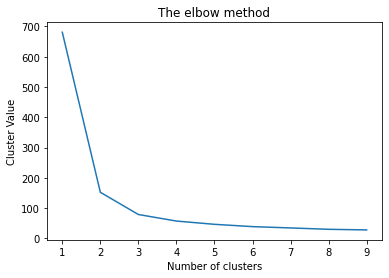

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(1, 10),clusters_value)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster Value') 
plt.show()

### Applying KMeans algorithm

In [10]:
alg = KMeans(n_clusters = 3,init = 'k-means++',max_iter = 300, n_init = 10, random_state = 42)

In [11]:
X = alg.fit_predict(points)

In [12]:
cluster_centers  = alg.cluster_centers_

### Plotting the clusters

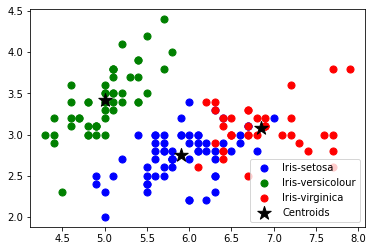

In [13]:
plt.scatter(points[X == 0, 0], points[X == 0, 1], 
            s = 50, c = 'blue', label = 'Iris-setosa')
plt.scatter(points[X == 1, 0], points[X == 1, 1], 
            s = 50, c = 'green', label = 'Iris-versicolour')
plt.scatter(points[X == 2, 0], points[X == 2, 1],
            s = 50, c = 'red', label = 'Iris-virginica')
plt.scatter(cluster_centers[0][0],cluster_centers[0][1], marker='*', color='black',s=200)
plt.scatter(cluster_centers[1][0],cluster_centers[1][1], marker='*', color='black',s=200,label="Centroids")
plt.scatter(cluster_centers[2][0],cluster_centers[2][1], marker='*', color='black',s=200)
plt.legend()